In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scipy
import scipy.spatial
import matplotlib.pyplot as plt

In [11]:
# Gaussian process posterior
def GP(X1, y1, X2, std_noise = 0):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    def kernel(xa, xb):
        """Exponentiated quadratic  with σ=1"""
        # L2 distance (Squared Euclidian)
        sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
        return np.exp(sq_norm)
    
    # Kernel of the observations
    kern_val11 = kernel(X1, X1) + ((std_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    kern_val12 = kernel(X1, X2)
    # Solve
    
    print(kern_val11.shape, kern_val12.shape)
    solved = scipy.linalg.solve(kern_val11, kern_val12, assume_a='pos').T
    print(solved.shape)
    print(y1.shape)
    # Compute posterior mean
    mean = solved @ y1
    # Compute the posterior covariance
    kern_val22 = kernel(X2, X2)
    cov = kern_val22 - (solved @ kern_val12)
    
    return mean, cov  # mean, covariance

### Without Noise

In [12]:
# Compute the posterior mean and covariance

# Define the true function that we want to regress on
f_sin = lambda x: ((np.sin(x))**4).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
mean, var = GP(X1, y1, X2)
# Compute the standard deviation at the test points to be plotted
std = np.sqrt(np.diag(var))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mean, cov=var, size=ny)

(8, 8) (8, 75)
(75, 8)
(8,)


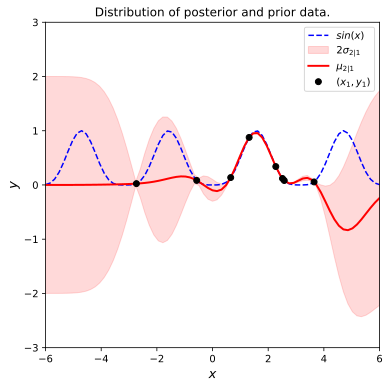

In [10]:
# Plot the postior distribution and some samples
fig, (ax1) = plt.subplots(
    nrows = 1, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mean-2*std, mean+2*std, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, mean, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()

### With added Gaussian noise

In [11]:
# Compute the posterior mean and covariance

std_noise = 1.  # The standard deviation of the noise
# Add noise kernel to the samples we sampled previously
y1 = y1 + ((std_noise ** 2) * np.random.randn(n1))

# Compute posterior mean and covariance
mean2, cov2 = GP(X1, y1, X2, std_noise)
# Compute the standard deviation at the test points to be plotted
std2 = np.sqrt(np.diag(cov2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=ny)

ValueError: 'y1' is not 1-dimensional

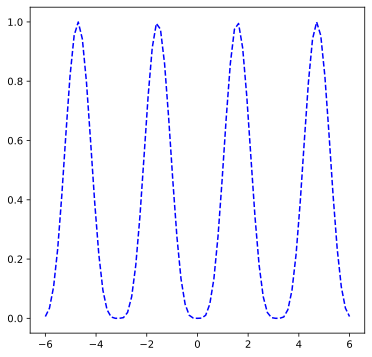

In [14]:
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mean2-2*cov2, mean2+2*cov2, color='red', 
                 alpha=0.15, label='$2\sigma_{2|1}$')
ax1.plot(X2, mean2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X2, y2, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
